Three Observable Trends:
1. CNN's most recent 100 tweets had the most negative sentiment of the 5 news Twitter accounts checked
2. CBS's most recent 100 tweets had the most postive sentiment of the 5 news Twitter accounts checked
3. Each Twitter accout had tweets with both negative and positive sentiments. The average sentiment for each source was within 0.157 of all the other account averages.

In [1]:
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
news_outlets = ('@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes')

news_results = []

for outlet in news_outlets:
    compound_list = []
    negative_list = []
    neutral_list = []
    positive_list = []
    text_list = []
    date_list = []
    tweet_nums = []
    tweet_number = 1

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(1, 6):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(outlet, page=x)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound_list.append(results["compound"])
            negative_list.append(results["neg"])
            neutral_list.append(results["neu"])
            positive_list.append(results["pos"])
            text_list.append(tweet["text"])
            date_list.append(tweet["created_at"])
            tweet_nums.append(tweet_number)
            tweet_number += 1

    # Create a dictionaty of results
    outlet_results = {
        "Outlet": outlet,
        "Compound Score": compound_list,
        "Negative Score" : negative_list,
        "Neutral Score" : neutral_list,
        "Positive Score" : positive_list,
        "Tweet Text" : text_list,
        "Tweet Date" : date_list,
        "Tweet Number": tweet_nums
    }

    # Append dictionary to list
    news_results.append(outlet_results)

    # Printing Some Results
    print(f"Outlet: {outlet}")
    print(f"Compound: {len(compound_list)}: {compound_list}")
    print(f"Tweets: {len(tweet_nums)}: {tweet_nums}")

Outlet: @BBC
Compound: 100: [0.0, 0.9054, -0.1195, -0.34, 0.624, -0.5423, 0.5994, 0.3612, 0.0, 0.0, -0.5216, -0.3182, 0.0, 0.0, -0.5267, -0.8625, 0.0258, 0.0, -0.4939, -0.3818, -0.5423, -0.5267, 0.2023, 0.7684, -0.5719, -0.0516, -0.5423, 0.5994, 0.0, 0.5719, 0.0, 0.128, 0.0, -0.2263, 0.5106, 0.0772, 0.0, -0.3818, 0.0, 0.743, 0.7684, 0.0, -0.0516, 0.0, -0.296, 0.0, 0.802, -0.5859, -0.4588, 0.6258, 0.128, 0.0, 0.5262, 0.7184, 0.4019, 0.6369, -0.4767, -0.2023, 0.0258, 0.0, 0.0, 0.0, 0.4215, 0.2023, 0.1027, 0.0, -0.4201, 0.0, 0.2023, 0.4199, 0.0, 0.0, 0.7717, 0.4215, 0.25, -0.4588, 0.0, 0.0, 0.0, -0.6808, 0.3182, 0.0, -0.4588, 0.0, 0.296, 0.0, 0.743, 0.5423, 0.0, 0.3612, 0.0, 0.296, 0.0, -0.6486, 0.0, 0.4939, -0.4404, 0.0, 0.0, 0.5423]
Tweets: 100: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 6

In [4]:
bbc_df = pd.DataFrame(news_results[0])
cbs_df = pd.DataFrame(news_results[1])
cnn_df = pd.DataFrame(news_results[2])
fox_df = pd.DataFrame(news_results[3])
nyt_df = pd.DataFrame(news_results[4])

In [5]:
bbc_df.head()

,Outlet,Compound Score,Negative Score,Neutral Score,Positive Score,Tweet Text,Tweet Date,Tweet Number
0,@BBC,0.0000,0.000,1.000,0.000,A 42.8 millisecond flash of the word “death” a...,Tue Sep 04 19:31:06 +0000 2018,1
1,@BBC,0.9054,0.000,0.615,0.385,Is monogamy outdated? Can you love more than o...,Tue Sep 04 19:03:06 +0000 2018,2
2,@BBC,-0.1195,0.212,0.593,0.195,"🤖 @jimalkhalili explores the AI revolution, ar...",Tue Sep 04 18:32:01 +0000 2018,3
3,@BBC,-0.3400,0.188,0.684,0.128,From the creator of Fleabag comes your new fav...,Tue Sep 04 18:06:10 +0000 2018,4
4,@BBC,0.6240,0.000,0.786,0.214,"One of Britain’s most successful actors, @rizm...",Tue Sep 04 16:06:05 +0000 2018,5


In [6]:
cnn_df.head()

,Outlet,Compound Score,Negative Score,Neutral Score,Positive Score,Tweet Text,Tweet Date,Tweet Number
0,@CNN,0.0000,0.000,1.000,0.000,Cystic fibrosis didn't define Claire Wineland....,Wed Sep 05 02:16:00 +0000 2018,1
1,@CNN,-0.3818,0.115,0.885,0.000,"Bob Woodward reveals Donald Trump as the ""King...",Wed Sep 05 02:08:02 +0000 2018,2
2,@CNN,-0.3612,0.175,0.717,0.108,After three years in the trenches of Facebook'...,Wed Sep 05 02:01:00 +0000 2018,3
3,@CNN,0.0000,0.000,1.000,0.000,RT @CuomoPrimeTime: “You can't keep breaking e...,Wed Sep 05 01:55:49 +0000 2018,4
4,@CNN,0.3818,0.000,0.833,0.167,Amazon is officially a $1 trillion company. Le...,Wed Sep 05 01:51:00 +0000 2018,5


In [7]:
bbc_df.to_csv("BBC.csv")
cbs_df.to_csv("CBS.csv")
cnn_df.to_csv("CNN.csv")
fox_df.to_csv("FOX.csv")
nyt_df.to_csv("NYT.csv")

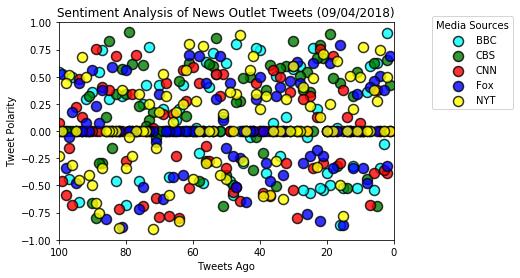

In [8]:
plt.scatter(bbc_df["Tweet Number"],
         bbc_df["Compound Score"], marker="o",edgecolors="black",
         alpha=0.8, label = "BBC", color = "cyan", s=100, linewidth='1.5')

plt.scatter(cbs_df["Tweet Number"],
         cbs_df["Compound Score"], marker="o",edgecolors="black",
         alpha=0.8, label = "CBS", color = "green", s=100, linewidth='1.5')

plt.scatter(cnn_df["Tweet Number"],
         cnn_df["Compound Score"], marker="o",edgecolors="black",
         alpha=0.8, label = "CNN", color = "red", s=100, linewidth='1.5')

plt.scatter(fox_df["Tweet Number"],
         fox_df["Compound Score"], marker="o",edgecolors="black",
         alpha=0.8, label = "Fox", color = "blue", s=100, linewidth='1.5')

plt.scatter(nyt_df["Tweet Number"],
         nyt_df["Compound Score"], marker="o",edgecolors="black",
         alpha=0.8, label = "NYT", color = "yellow", s=100, linewidth='1.5')

now = datetime.now()
now = now.strftime("%m/%d/%Y")
plt.title(f"Sentiment Analysis of News Outlet Tweets ({now})")
plt.xlim(100,0)
plt.ylim(-1,1)
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend(bbox_to_anchor=(1.1, 1.05), title = "Media Sources")
plt.savefig('news_plot.png', bbox_inches='tight')
plt.show()

In [9]:
average_sentiments = []
for result in news_results:
    name = result['Outlet']
    average_score = round(np.mean(result['Compound Score']), 3)
    data = {
        'Outlet' : name,
        'Overall Sentiment' : average_score
    }
    average_sentiments.append(data)
print(average_sentiments)

[{'Outlet': '@BBC', 'Overall Sentiment': 0.05}, {'Outlet': '@CBS', 'Overall Sentiment': 0.136}, {'Outlet': '@CNN', 'Overall Sentiment': -0.021}, {'Outlet': '@FoxNews', 'Overall Sentiment': 0.023}, {'Outlet': '@nytimes', 'Overall Sentiment': 0.051}]


In [10]:
outlet = []
sentiment_score = []

for sentiment in average_sentiments:
    outlet.append(sentiment['Outlet'])
    sentiment_score.append(sentiment['Overall Sentiment'])

info = {
    'Outlets' : outlet,
    'Sentiment Scores' : sentiment_score
}

sentiment_df = pd.DataFrame(info)
sentiment_df.head()

,Outlets,Sentiment Scores
0,@BBC,0.050
1,@CBS,0.136
2,@CNN,-0.021
3,@FoxNews,0.023
4,@nytimes,0.051


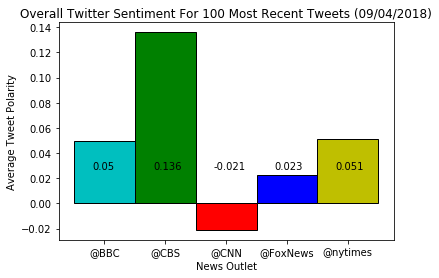

In [15]:
fig, ax = plt.subplots()
x_axis = np.arange(5)
tick_locations = [value for value in x_axis] 
ax.set_xticklabels([" "] + outlet, rotation="horizontal")
ax.bar(x_axis, sentiment_df['Sentiment Scores'], color=['c', 'g', 'r', 'b','y'], align='center', width=-1, edgecolor="black")

# Use functions to label the percentages of changes
ax.text(-0.2, 0.027, s = sentiment_score[0])
ax.text(0.8, 0.027, s = sentiment_score[1])
ax.text(1.8, 0.027, s = sentiment_score[2])
ax.text(2.8, 0.027, s = sentiment_score[3])
ax.text(3.8, 0.027, s = sentiment_score[4])

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%m/%d/%Y")
plt.title(f"Overall Twitter Sentiment For 100 Most Recent Tweets ({now})")
plt.ylabel("Average Tweet Polarity")
plt.xlabel("News Outlet")
plt.savefig('sentiment_bargraph.png')
plt.show()

In [38]:
compound_pattern = []
outlet_name = []
pos_tweets = []
neg_tweets = []
neu_tweets = []

for x in range(len(news_results)):
    positive_count = 0
    neg_count = 0
    neu_count = 0
    
    for result in news_results[x]['Compound Score']:
        if float(result) > 0:
            positive_count += 1
        elif float(result) == 0:
            neu_count += 1
        else:
            neg_count += 1
    
    outlet_name.append(news_results[x]['Outlet'])
    pos_tweets.append(positive_count)
    neg_tweets.append(neg_count)
    neu_tweets.append(neu_count)

data = {
    'outlet' : outlet_name,
    'number of positive': pos_tweets,
    'number of negative': neg_tweets,
    'number of neutral': neu_tweets 
}

tweet_ratio_df = pd.DataFrame(data)
tweet_ratio_df.head()

,outlet,number of positive,number of negative,number of neutral
0,@BBC,38,28,34
1,@CBS,43,20,37
2,@CNN,34,31,35
3,@FoxNews,35,31,34
4,@nytimes,43,29,28
